# A Simple PyTorch Script for Linear Regression

[PyTorch](http://pytorch.org/) is a powerful tool for both numeric computing and differential machine learning, especially deep learning. This short tutorial shows how to implement a linear regression method using just a few lines of Python code with the help of PyTorch.

In [7]:
## load required modules
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.optim as optim
from sys import exit

In [8]:
## generate simulated data X and Y. 
## Y is calculated by applying a linear operation of X and adding Gaussian noise
np.random.seed(0)
X = np.random.normal(loc = 0, scale = 5, size = 20)
X = X.astype(np.float32)
k = 2.3 ## reference slope value
b = 1.9 ## reference intercept value
Y = k * X + b + np.random.normal(loc = 0, scale = 2.5, size = 20)
Y = Y.astype(np.float32)

Defining and training a machine learning model using PyTorch is quite easy and natural. [Variable](http://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#variable) objects are used to represent the data and parameters of the model. Operations are naturally applied on variable to calculate the objective loss function of the model. Once the objective loss function is calculated, the [autograd](http://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) package can take care of calculating the gradients for each parameter automatically and the [optim](http://pytorch.org/docs/0.3.0/optim.html) can update the value of parameters based on parameters' gradient. Therefore, PyTorch takes the burden of deriving formulas for gradient and implementing optimization off the users.

In [9]:
## define the variables used for building the model
slope = Variable(torch.zeros(1), requires_grad = True)
intercept = Variable(torch.zeros(1), requires_grad = True)
X = Variable(torch.from_numpy(X))
Y = Variable(torch.from_numpy(Y))

In [10]:
## Stocastic Gradient Descent optimizer
optimizer = optim.SGD([slope, intercept], lr = 0.01)

## train the model
for step in range(1001):
    ## set gradients to zero for all the variables passed to optimizer
    optimizer.zero_grad()
    
    ## the following two lines of code are inside the for loop
    ## because PyTorch uses dynamic computation graphs
    pred = slope * X + intercept
    loss = torch.mean((Y - pred)**2)
    
    ## calculate gradients
    loss.backward()
    
    ## take one step forward
    optimizer.step()
    
    if step % 50 == 0:
        print("step: {:>4}, loss:{:6.3f}, slope: {:.2f}, intercept: {:.2f}".format(
                step, loss.data[0], slope.data[0], intercept.data[0]))

step:    0, loss:183.216, slope: 1.34, intercept: 0.17
step:   50, loss: 9.189, slope: 2.45, intercept: 1.08
step:  100, loss: 8.862, slope: 2.41, intercept: 1.47
step:  150, loss: 8.779, slope: 2.38, intercept: 1.67
step:  200, loss: 8.758, slope: 2.37, intercept: 1.77
step:  250, loss: 8.753, slope: 2.37, intercept: 1.82
step:  300, loss: 8.751, slope: 2.36, intercept: 1.84
step:  350, loss: 8.751, slope: 2.36, intercept: 1.85
step:  400, loss: 8.751, slope: 2.36, intercept: 1.86
step:  450, loss: 8.751, slope: 2.36, intercept: 1.86
step:  500, loss: 8.751, slope: 2.36, intercept: 1.86
step:  550, loss: 8.751, slope: 2.36, intercept: 1.86
step:  600, loss: 8.751, slope: 2.36, intercept: 1.87
step:  650, loss: 8.751, slope: 2.36, intercept: 1.87
step:  700, loss: 8.751, slope: 2.36, intercept: 1.87
step:  750, loss: 8.751, slope: 2.36, intercept: 1.87
step:  800, loss: 8.751, slope: 2.36, intercept: 1.87
step:  850, loss: 8.751, slope: 2.36, intercept: 1.87
step:  900, loss: 8.751, sl

In [11]:
## print the learned parameters
print("="*60)
print("Reference slope: {:.2f}, Fitted slope: {:.2f}".format(k, slope.data[0]))
print("Reference intercept: {:.2f}, Fitted intercept: {:.2f}".format(b, intercept.data[0]))
print("="*60)

Reference slope: 2.30, Fitted slope: 2.36
Reference intercept: 1.90, Fitted intercept: 1.87


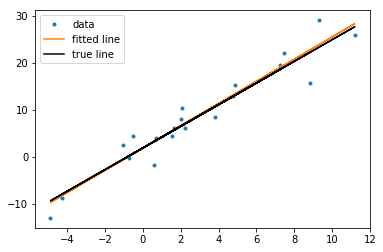

In [12]:
## plot the data and the fitted line
fig = plt.figure(0)
plt.plot(X.data.numpy(), Y.data.numpy(), '.', label = "data")
plt.plot(X.data.numpy(), slope.data[0]*X.data.numpy() + intercept.data[0], label = "fitted line")
plt.plot(X.data.numpy(), k*X.data.numpy() + b, label = "true line", color = 'k')
plt.legend()